In [1]:
from warnings import simplefilter
import os
import numpy as np
import pandas as pd
import seaborn
from sklearn.metrics import mean_squared_error
from sktime.datasets import load_airline
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.model_selection import  temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.utils.plotting import plot_series

simplefilter("ignore", FutureWarning)
%matplotlib inline

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='Sale'>)

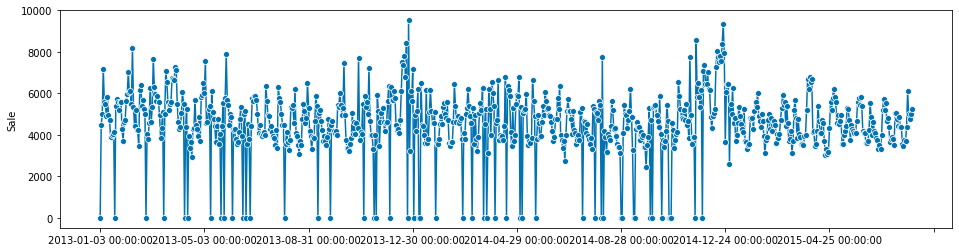

In [53]:
file = "C:/Users/gurpr/Videos/BetaSci/Rossmann_Store1_Zero_Noise50.csv"
pwd = os.getcwd()
os.chdir(os.path.dirname(file))
df = pd.read_csv(os.path.basename(file), header = 0, parse_dates=[0], dayfirst=True, index_col = 0, squeeze = True)
#df['Date'].dt.strftime('%d/%m/%Y')
#df[1] = df.index.floor('d')
#series = pd.Series(data=['Sale'], index=file.index)
df = df.sort_index()

df.iloc[0]
plot_series(df)
#print(series.head())
#series.index=series.index.map(str)
#series.plot()

In [54]:
df.index = df.index.to_period("D")
df.index

PeriodIndex(['2013-01-03', '2013-01-04', '2013-01-05', '2013-01-07',
             '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
             '2013-01-12', '2013-01-14',
             ...
             '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
             '2015-07-25', '2015-07-27', '2015-07-28', '2015-07-29',
             '2015-07-30', '2015-07-31'],
            dtype='period[D]', name='Date', length=780, freq='D')

In [57]:
z_train, z_test = temporal_train_test_split(df, test_size=195)
#plot_series(z_train, z_test, labels=["z_train", "z_test"])
#print(z_train.shape[0], z_test.shape[0])
#print('train_length:',z_train.shape, '\n test_length:', z_test.shape)
z_train = z_train.astype(np.float64)
#print(z_train.dtype)


In [59]:
fz = np.arange(len(z_test))+1
#fz = ForecastingHorizon(z_test .index, is_relative=False)
fz

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [32]:
def smape(A, F):
    return (100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F))))/100

In [60]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(z_train)
z_pred = forecaster.predict(fz)
print(z_pred)
#plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
print(smape(z_pred, z_test))
print(mean_squared_error(z_test, z_pred, squared=False))

2014-12-06    6207.0
2014-12-07    6207.0
2014-12-08    6207.0
2014-12-09    6207.0
2014-12-10    6207.0
               ...  
2015-06-14    6207.0
2015-06-15    6207.0
2015-06-16    6207.0
2015-06-17    6207.0
2015-06-18    6207.0
Freq: D, Length: 195, dtype: float64
0.25330362548872654
1852.2270628375163


In [61]:
out = z_pred.astype(np.int)
out.round()
print(out)
out.to_csv(r'C:\Users\gurpr\Videos\BetaSci\naive_pred_zero_noise.csv', index=False, header=True)

2014-12-06    6207
2014-12-07    6207
2014-12-08    6207
2014-12-09    6207
2014-12-10    6207
              ... 
2015-06-14    6207
2015-06-15    6207
2015-06-16    6207
2015-06-17    6207
2015-06-18    6207
Freq: D, Length: 195, dtype: int32


In [95]:
forecaster = ExponentialSmoothing(trend="mul", seasonal="mul", sp=290) #sp=365
#forecaster = ExponentialSmoothing(trend=None,
                                  #seasonal=None, sp=None)
forecaster.fit(z_train)
z_pred = forecaster.predict(fz)
#print(z_pred)
#z_pred.round()
#z_pred = z_pred.astype(np.int)
#print(z_test)
print(z_pred.shape)
#plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
print(smape(z_pred, z_test))
print(mean_squared_error(z_test, z_pred, squared=False))



(195,)
0.21354498124764362
1810.1185709934698


C:\Users\gurpr\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [96]:
# #test sp values
# # Lowest RMSE for sp 208 and lowest smape for sp = 26
# for x in range (2,292):
#     forecaster = ExponentialSmoothing(trend="mul", seasonal="mul", sp=x) #sp=365
#     forecaster.fit(z_train)
#     z_pred = forecaster.predict(fz)
#     #print(z_pred.shape)
#     #plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
#     print("For sp: " + str(x) + "is " + str(round(smape(z_pred, z_test),3)) + " and " +
#           str(round(mean_squared_error(z_test, z_pred, squared=False),0)))

In [97]:
#Save pandas series to csv file
out = z_pred.astype(np.int)
out.round()
print(out)
out.to_csv(r'C:\Users\gurpr\Videos\BetaSci\es_pred_noise.csv', index=False, header=True)

2014-12-06    2549
2014-12-07    2735
2014-12-08    4678
2014-12-09    4011
2014-12-10    3506
              ... 
2015-06-14    6059
2015-06-15    3604
2015-06-16    3755
2015-06-17    5049
2015-06-18    6035
Freq: D, Length: 195, dtype: int32


In [98]:
forecaster = ThetaForecaster(sp=230)
forecaster.fit(z_train)
alpha = 0.05  # 95% prediction intervals
z_pred, pred_ints = forecaster.predict(fz, return_pred_int=True, alpha=alpha)
#plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
rmse_thetaZ = mean_squared_error(z_test, z_pred, squared=False)
print(rmse_thetaZ)
print(z_pred)

1653.9516517384545
2014-12-06    4137.782676
2014-12-07    4671.530742
2014-12-08    4434.547715
2014-12-09    7881.824249
2014-12-10    3819.533129
                 ...     
2015-06-14    5431.370691
2015-06-15    4810.740734
2015-06-16    4096.223289
2015-06-17    6141.119370
2015-06-18    4497.100042
Freq: D, Length: 195, dtype: float64


In [99]:
out = z_pred.astype(np.int)
out.round()
print(out)
out.to_csv(r'C:\Users\gurpr\Videos\BetaSci\theta_pred_noise.csv', index=False, header=True)


2014-12-06    4137
2014-12-07    4671
2014-12-08    4434
2014-12-09    7881
2014-12-10    3819
              ... 
2015-06-14    5431
2015-06-15    4810
2015-06-16    4096
2015-06-17    6141
2015-06-18    4497
Freq: D, Length: 195, dtype: int32


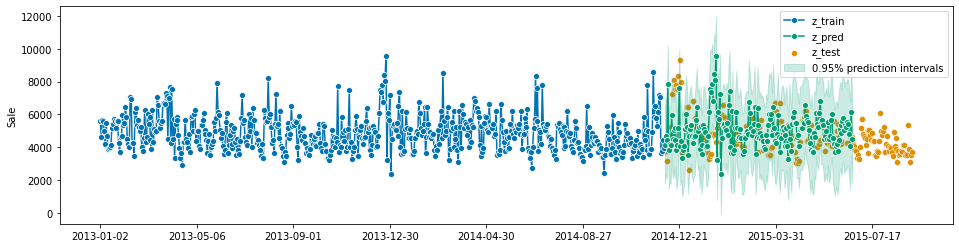

In [100]:
fig, ax = plot_series(z_train, z_test, z_pred, labels=["z_train", "z_test", "z_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    pred_ints["lower"],
    pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();